# neural network（神经网络）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告

In [2]:
def load_data(path):
    
    data = sio.loadmat(path)#加载MATLAB文件,返回的是以各个变量名为key，数组为values的字典
    print(data)
    
    #事实上，图像在martix X中表示为400维向量（其中有5,000个）。400维“特征”是在原始20 x 20共400个像素点中，每个像素的灰度强度。
    #类标签则被保存在向量y中，作为表示图像中数字的数字类。
    
    X = data.get('X')  # 查看data情况后，从字典中取出key=X的项的value值，存入X中，其实就是(5000,400)的二维列表

    y = data.get('y')  # 查看data情况后，从字典中取出key=y的项的value值，存入y中，其实就是(5000,1)的列表
    
    y = y.reshape(y.shape[0])  # 将其转换为列向量

    return X, y

In [3]:
#载入数据，得到特征x和标签y
X, y = load_data('ex3data1.mat')

print(X.shape)
print(y.shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}
(5000, 400)
(5000,)


In [4]:
def plot_an_image(image):#用来根据单个样本的400条数据绘制单个图片
    
    fig, ax = plt.subplots(figsize=(1, 1))#设置图片尺寸为1*1
    
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)#cmap用来定义颜色的映射方式
    
    plt.xticks(np.array([]))  # 将坐标轴x和y的刻度都设置为空，也就是不设置xy刻度，只画图
    
    plt.yticks(np.array([]))

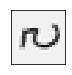

this should be 5


In [5]:
pick_one = np.random.randint(0, 5000)#从第0-5000个样本中随机选择第pick_one个样本

plot_an_image(X[pick_one, :])#取出第pick_one个样本所在的行的一整行数据，共400个，然后根据这400条数据绘制出数据对应的图片

plt.show()

print('this should be {}'.format(y[pick_one]))
#画图后再取出第pick_one个样本对应的标签值

In [6]:
def plot_100_image(X):#用来根据100个样本的400*100条数据绘制100个图片

    size = int(np.sqrt(X.shape[1]))#sqrt用来给括号内元素开方的，X=(5000, 400)，因此size=20，这是用来确定图片尺寸的

    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # #从第0-5000个样本中随机选择100个样本,存入列表sample_idx
    
    sample_images = X[sample_idx, :]#取出那100个样本所在的行的一整行数据，共400个，存入sample_images中，sample_images=100*400

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True, figsize=(8, 8))
    #nrows,ncols表示子图网的行数与列数；sharex，sharey表示所有10*10=100个子图都共享一个x轴、一个y轴；figsize表示图片尺寸为8*8

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)),
                                   cmap=matplotlib.cm.binary)
    #绘制100个子图，r表示绘制在第r行，c表示第c列，第r行第c列的数据在数组中就是第10 * r + c组[400]数据
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))  
            # 将坐标轴x和y的刻度都设置为空，也就是不设置xy刻度，只画图

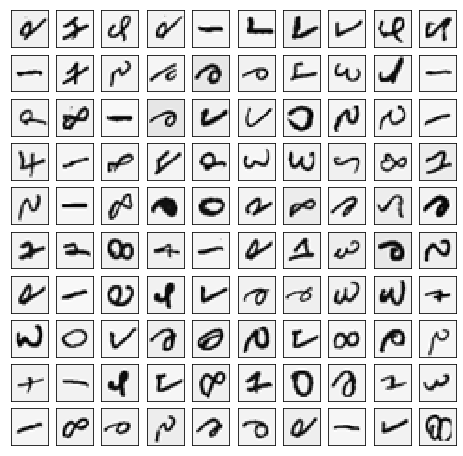

In [7]:
plot_100_image(X)

plt.show()

In [8]:
#重新读取一遍数据，返回特征X与标签y
raw_X, raw_y = load_data('ex3data1.mat')

print(raw_X.shape)
print(raw_y.shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}
(5000, 400)
(5000,)


# 准备数据

In [9]:
#在400个特征前面插入一列全1数据，也就是用来表示x0的
X = np.insert(raw_X, 0, values=np.ones(raw_X.shape[0]), axis=1)

X.shape

(5000, 401)

In [10]:
np.unique(raw_y)#查看有几类标签，也就是raw_y的取值有几种

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [11]:
#y的取值在这里有10种，1..10，它们将数字0表示为类别10，因为matlab数据的索引是从1开始的

y_matrix = []

for k in range(1, 11):
    y_matrix.append((raw_y == k).astype(int))
    #从k=1开始，遍历y的5000个值，每个都判断值是否为1，如果为1，则此位置上的元素为1，否则为0，得到长度为5000的一维数组，将这个一维数组加入y_matrix
    #从k=2开始，遍历y的5000个值，每个都判断值是否为1，如果为1，则此位置上的元素为2，否则为0，得到长度为5000的一维数组，将这个一维数组加入y_matrix
    #...从1到10，得到一个10*5000的二维列表，原理见配图 "向量化标签.png"

y_matrix = [y_matrix[-1]] + y_matrix[:-1]
#所谓第十列的数据，其图片上的数字其实是0，因此按照正常规则，把最后一列的数据挪到最开始
#这样，在y_matrix[i]的5000个数据中，如果第j个取值为1，就说明在原样本中的第j个样本表示的图片即为数字i

y = np.array(y_matrix)

y.shape

(10, 5000)

In [12]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

# train 1 model（训练一维模型）

In [13]:
def cost(theta, X, y):#返回正则化损失函数值J（θ）的前半部分，也就是不考虑正则化时的J（θ）
    
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [14]:
#计算正则化损失函数𝐽(𝜃)
def regularized_cost(theta, X, y, l=1):
    
    theta_j1_to_n = theta[1:]#在正则化中不惩罚常数项，即不惩罚theta0
    
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()#此项是后面多加的正则项，前面的正常项在return时会计算

    return cost(theta, X, y) + regularized_term

# regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [15]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

In [16]:
def gradient(theta, X, y):#返回正则化梯度函数值的前半部分，也就是不考虑正则化时、在一次梯度下降过程中的梯度，即每个theta的偏导
    
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [17]:
#用以上公式计算每个theta的偏导，也就是在一次梯度下降过程中的梯度，注意在正则化过程中不惩罚theta0
def regularized_gradient(theta, X, y, l=1):

    theta_j1_to_n = theta[1:]#取出目前所有的theta，存入列表theta_j1_to_n，但不要第0项，也就是不惩罚theta0
    
    regularized_theta = (l / len(X)) * theta_j1_to_n#将theta_j1_to_n内所有元素*(λ/m)

    regularized_term = np.concatenate([np.array([0]), regularized_theta])#用concatenate一次完成多个数组的拼接，其实就是在regularized_theta前面手动加个元素0，代表常数项theta0

    return gradient(theta, X, y) + regularized_term
#用以上公式计算每个theta的偏导，原来的部分仍用gradient方法计算，正则化新添加的内容则用regularized_term计算

In [18]:
#只训练对于数字0的分类器模型，X为5000*401的特征矩阵（包含x0项），y为5000*1的标签向量，标签中是对于每个样本是否为0的判断，lambda常数用于正则化
def logistic_regression(X, y, l=1):

    theta = np.zeros(X.shape[1])#将权重矩阵theta初始化为长度为401的全0一维数组

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    # 根据优化器一步得出最终优化结果，res.x即为最终的theta矩阵
    final_theta = res.x

    return final_theta

In [19]:
#只训练对于数字0的分类器模型，X为5000*401的特征矩阵（包含x0项），y为5000*1的标签向量，标签中是对于每个样本是否为0的判断
t0 = logistic_regression(X, y[0])

print(t0.shape)

(401,)


In [20]:
def predict(x, theta):
    
    prob = sigmoid(x @ theta)#求出预测后的具体y值，再将其套入sigmod函数，用来分类
    
    return (prob >= 0.5).astype(int)#如果prob值>=0.5，则将其视为1，否则为0，用来分类

In [21]:
#显示模型预测的准确率
y_pred = predict(X, t0)

print('Accuracy={}'.format(np.mean(y[0] == y_pred)))

Accuracy=0.9974


# train k model（训练k维模型）

In [22]:
#训练对于数字0-10的分类器模型，X为5000*401的特征矩阵（包含x0项），每个y均为5000*1的标签向量，标签中是对于每个样本是否为0-10的判断
k_theta = np.array([logistic_regression(X, y[k]) for k in range(10)])
#最终得到的是10个分类器模型，每个模型都有401个特征权重

print(k_theta.shape)

(10, 401)


# 进行预测
* think about the shape of k_theta, now you are making $X\times\theta^T$
> $(5000, 401) \times (10, 401).T = (5000, 10)$
* after that, you run sigmoid to get probabilities and for each row, you find the highest prob as the answer

In [23]:
prob_matrix = sigmoid(X @ k_theta.T)

In [24]:
np.set_printoptions(suppress=True)#使数组打印更漂亮

prob_matrix

array([[0.99577154, 0.        , 0.00053523, ..., 0.00006466, 0.00003912,
        0.00172038],
       [0.99834553, 0.0000001 , 0.0000561 , ..., 0.00009681, 0.0000029 ,
        0.00008489],
       [0.99139689, 0.        , 0.00056816, ..., 0.00000655, 0.02653079,
        0.00197372],
       ...,
       [0.00000068, 0.04139675, 0.00321097, ..., 0.00012719, 0.00297362,
        0.70758485],
       [0.00001843, 0.00000013, 0.00000009, ..., 0.00164922, 0.06820125,
        0.86116746],
       [0.02880239, 0.        , 0.00012976, ..., 0.36622472, 0.00498052,
        0.14831962]])

In [25]:
y_pred = np.argmax(prob_matrix, axis=1)#按行观察y_pred的每一行数据，取出在本行中的值最大数所在的索引位置（其实就是取出将样本取值预测为0-10时，概率最高的那个数，将其作为最终的预测值）

y_pred

array([0, 0, 0, ..., 9, 9, 7], dtype=int64)

In [26]:
y_answer = raw_y.copy() #取出5000条样本的原始标签

y_answer[y_answer==10] = 0 #将原始标签值为10的元素值都改为0

In [27]:
print(classification_report(y_answer, y_pred))#观察预测准确率

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500

   micro avg       0.94      0.94      0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



# 神经网络模型图示
<img style="float: left;" src="../img/nn_model.png">

In [28]:
def load_weight(path):
    
    data = sio.loadmat(path)
    
    return data['Theta1'], data['Theta2']
#Theta1是神经网络中第1层（输入层）到第2层（隐藏层）的权重矩阵，Theta2是神经网络中第2层（隐藏层）到第3层（输出层）的权重矩阵
#theta_j的维度为（j+1层中的单位数量）*（j层中的单位数量+1），因此各层中隐藏单元数量为400-25-10

In [29]:
theta1, theta2 = load_weight('ex3weights.mat')

theta1.shape, theta2.shape

((25, 401), (10, 26))

 因此在数据加载函数中，原始数据做了转置，然而，转置的数据与给定的参数不兼容，因为这些参数是由原始数据训练的。 所以为了应用给定的参数，我需要使用原始数据（不转置）

In [30]:
X, y = load_data('ex3data1.mat')

X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)  # 在输入层的各特征前面添加一列偏置项x0

X.shape, y.shape

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


((5000, 401), (5000,))

# feed forward prediction（前馈预测）

In [31]:
a1 = X #第1层的神经元们，其实就是输入层内输入的数据矩阵，共5000条数据，每条都分成401个特征输入

In [32]:
z2 = a1 @ theta1.T # (5000, 401) @ (25,401).T = (5000, 25)

z2.shape

(5000, 25)

In [33]:
a2 = sigmoid(np.insert(z2, 0, values=np.ones(z2.shape[0]), axis=1))# 在z2的各特征前面添加一列偏置项后，再将sigmoid函数逐个作用于所有元素，生成a2

a2.shape

(5000, 26)

In [34]:
z3 = a2 @ theta2.T

z3.shape

(5000, 10)

In [35]:
a3 = sigmoid(z3)#得到每条样本最终的输出值

print(a3.shape)
a3

(5000, 10)


array([[0.00013825, 0.0020554 , 0.00304012, ..., 0.00049102, 0.00774326,
        0.99622946],
       [0.00058776, 0.00285027, 0.00414688, ..., 0.00292311, 0.00235617,
        0.99619667],
       [0.00010868, 0.0038266 , 0.03058551, ..., 0.07514539, 0.0065704 ,
        0.93586278],
       ...,
       [0.06278247, 0.00450406, 0.03545109, ..., 0.0026367 , 0.68944816,
        0.00002744],
       [0.00101909, 0.00073436, 0.00037856, ..., 0.01456166, 0.97598976,
        0.00023337],
       [0.00005908, 0.00054172, 0.0000259 , ..., 0.00700508, 0.73281465,
        0.09166961]])

# 准确率
 
虽然人工神经网络是非常强大的模型，但训练数据的准确性并不能完美预测实际数据，在这里很容易过拟合。

In [36]:
y_pred = np.argmax(a3, axis=1) + 1  

#按行观察输出层a3的每一行数据，取出在本行中的值最大数所在的索引位置（其实就是取出将样本取值预测为0-10时，概率最高的那个数，将其作为最终的预测值）

#在numpy中，0是基本索引，而matlab中，基本索引要+1


correct = [1 if a == b else 0 for (a, b) in zip(y_pred,y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 97.52%


In [37]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

   micro avg       0.98      0.98      0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

